In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from   statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA

### Data description

This dataset describes the evolution of price, vat, excise, net, change of 6 different fuel brands from 2005 to 2021

In [2]:
df = pd.read_csv('fuel_price.csv')

In [3]:
df.head(5)

,SURVEY_DATE,PRODUCT_ID,PRODUCT_NAME,PRICE,VAT,EXCISE,NET,CHANGE
0,2005-01-03,1,Euro-Super 95,1115.75,185.96,558.64,371.15,-1.57
1,2005-01-03,2,Automotive gas oil,1018.28,169.71,403.21,445.36,-0.33
2,2005-01-03,3,Heating gas oil,948.50,158.08,403.21,387.21,-22.55
3,2005-01-03,5,LPG,552.50,92.08,156.62,303.80,0.22
4,2005-01-03,6,Residual fuel oil,553.25,50.30,166.84,336.11,-12.21


In [4]:
df.describe()

,PRODUCT_ID,PRICE,VAT,EXCISE,NET,CHANGE
count,4980.000000,4980.000000,4980.000000,4980.000000,4980.000000,4980.000000
mean,4.166667,998.256902,150.055279,323.068333,525.133289,0.397129
std,2.409714,409.611926,97.473996,232.170385,134.606747,12.770133
min,1.000000,216.740000,0.000000,31.390000,185.350000,-93.060000
25%,2.000000,649.142500,73.805000,147.270000,425.492500,-4.942500
50%,4.000000,1006.420000,158.250000,285.025000,521.520000,0.110000
75%,6.000000,1351.082500,234.480000,564.000000,610.140000,6.630000
max,8.000000,1889.810000,327.980000,730.800000,851.860000,132.390000


### Data Visualization

#### PRICE TIME SERIES

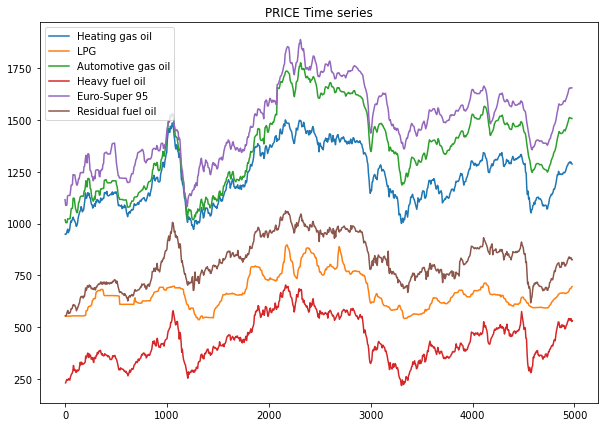

In [46]:
dataFrameS = []
brands = list(set(df["PRODUCT_NAME"].values))
plt.figure(plt.figure(figsize=(10,7)) )
for product in brands:
    temp = df[df["PRODUCT_NAME"] == product]
    dataFrameS.append(temp)
    temp["PRICE"].plot(label = product)
#    plt.title(product)
plt.title("PRICE Time series")
plt.legend()

#### VAT Time Series

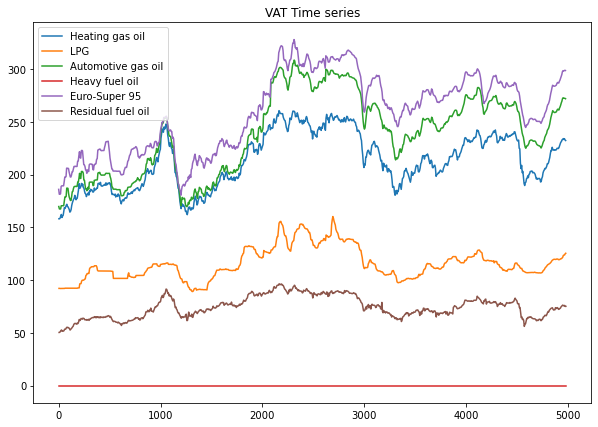

In [47]:
i = 0
plt.figure(plt.figure(figsize=(10,7)) )
for dataFrame in dataFrameS:
    dataFrame["VAT"].plot(label = brands[i])
    i += 1
plt.title("VAT Time series")
plt.legend()

#### NET Time Series

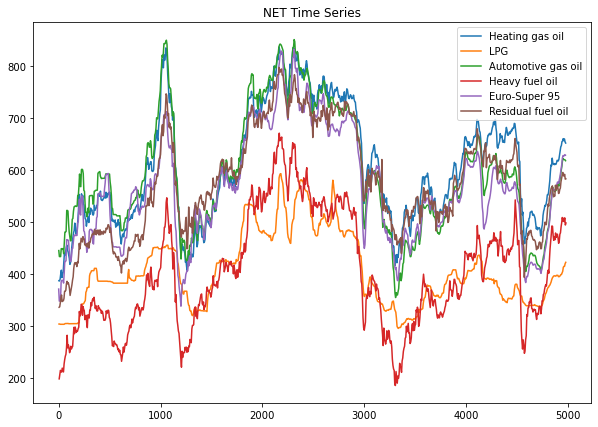

In [48]:
i = 0
plt.figure(plt.figure(figsize=(10,7)) )
for dataFrame in dataFrameS:
    dataFrame["NET"].plot(label = brands[i])
    i += 1
plt.title("NET Time Series")
plt.legend()

#### CHANGE Time Series

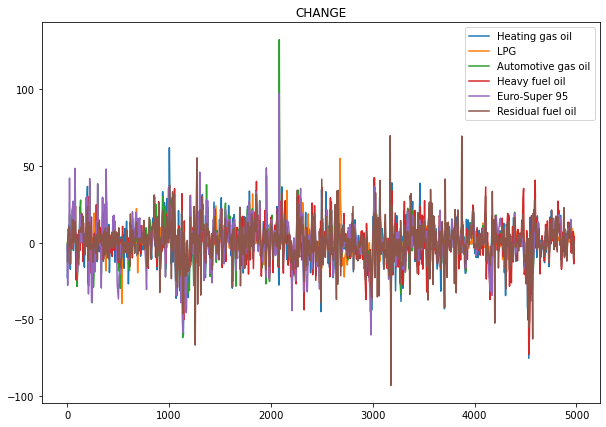

In [49]:
i = 0
plt.figure(plt.figure(figsize=(10,7)) )
for dataFrame in dataFrameS:
    dataFrame["CHANGE"].plot(label = brands[i])
    i += 1
plt.title("CHANGE")
plt.legend()

Seeing the pattern of evolution, we will focus on the two datasets "PRICE" and "CHANGE"

To apply ARIMA(p,d,q) model, we first check if the data is stationary 

To do this, we performs Augumented Dickey Fuller Test (adfuller)

In [44]:
i = 0
for dataFrame in dataFrameS:
    print(brands[i])
    result = adfuller(dataFrame["CHANGE"])
    print("ADF Statistic: ", result[0])
    print('p-value: %f' % result[1])
    print("\n")
    i += 1

Heating gas oil
ADF Statistic:  -16.17954414525697
p-value: 0.000000


LPG
ADF Statistic:  -9.038934672770722
p-value: 0.000000


Automotive gas oil
ADF Statistic:  -9.81639807041187
p-value: 0.000000


Heavy fuel oil
ADF Statistic:  -13.758718688085144
p-value: 0.000000


Euro-Super 95
ADF Statistic:  -9.4328205113585
p-value: 0.000000


Residual fuel oil
ADF Statistic:  -11.167376193488291
p-value: 0.000000




We see that the p-value is below 0.05, so we conclude that it is the data is stationary

We look for a ARIMA(p,d,q) model which capture the pattern of data

ARIMA(p,d,q) is a model that can be fitted to time series data to predict future points in the series.

We can split the Arima term into three terms, AR, I, MA:

AR(p) stands for the autoregressive model, the p parameter is an integer that confirms how many lagged series are going to be used to forecast periods ahead.

I(d) is the differencing part, the d parameter tells how many differencing orders are going to be used to make the series stationary.

MA(q) stands for moving average model, the q is the number of lagged forecast error terms in the prediction equation. SARIMA is seasonal ARIMA and it is used with time series with seasonality.

To determine the three parameters, we first look into the Autocorrelation function (ACF) and and Partial Autocorrelation function (PACF)

Heating gas oil
LPG
Automotive gas oil
Heavy fuel oil
Euro-Super 95
Residual fuel oil


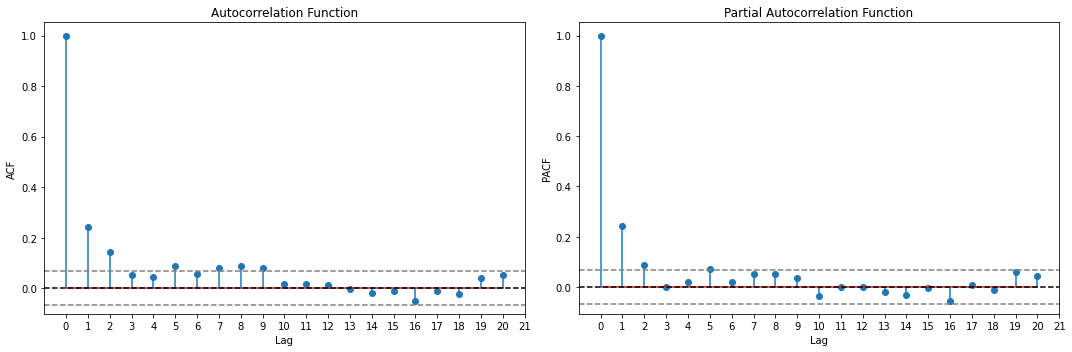

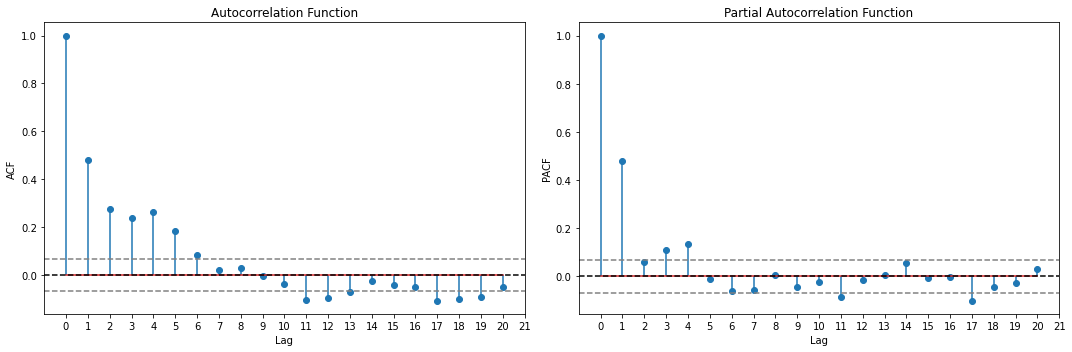

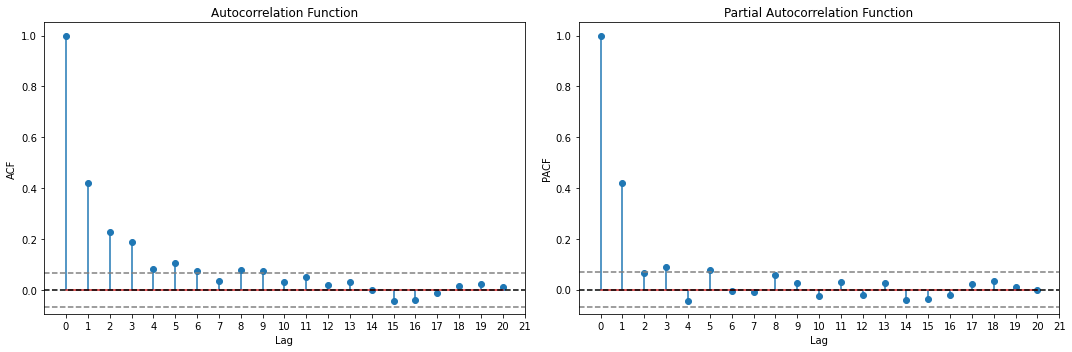

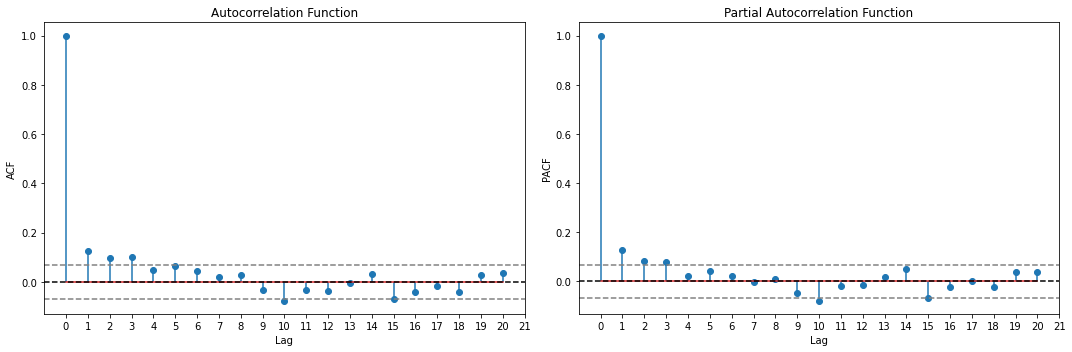

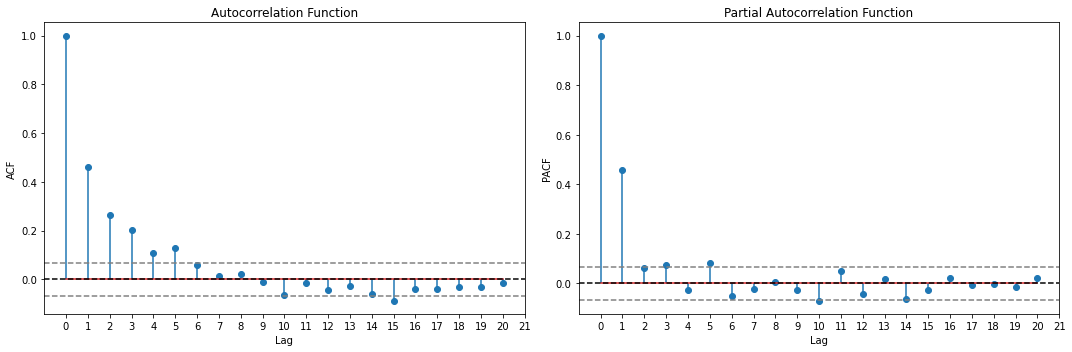

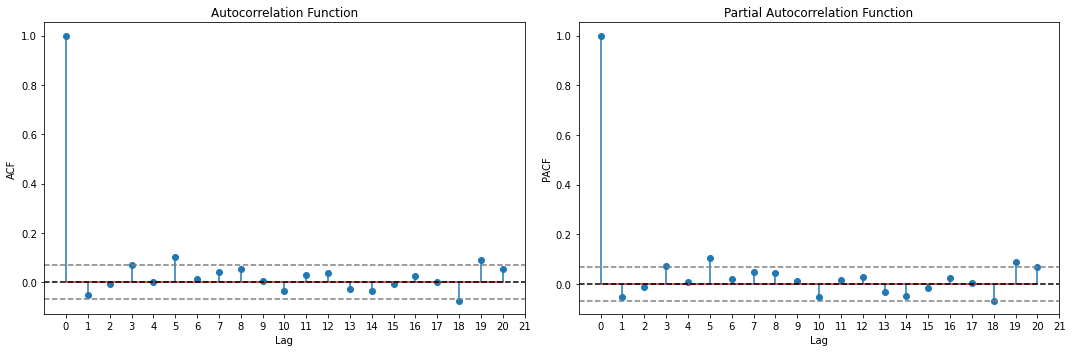

In [51]:
i = 0
for dataFrame in dataFrameS:
    print(brands[i])
    lag_acf    =   acf(dataFrame["CHANGE"],   nlags=20)
    lag_pacf   =   pacf(dataFrame["CHANGE"], nlags=20, method='ols')
    length = len(dataFrame["CHANGE"])
    #Plot ACF: 

    plt.figure(figsize = (15,5))
    plt.subplot(121) 
    plt.stem(lag_acf)
    plt.axhline(y = 0, linestyle='--',color='black')
    plt.axhline(y = -1.96/np.sqrt(length),linestyle='--',color='gray')
    plt.axhline(y = 1.96/np.sqrt(length),linestyle='--',color='gray')
    plt.xticks(range(0,22,1))
    plt.xlabel('Lag')
    plt.ylabel('ACF')
    plt.title('Autocorrelation Function')
    #Plot PACF:

    plt.subplot(122)
    plt.stem(lag_pacf)
    plt.axhline(y = 0, linestyle = '--', color = 'black')
    plt.axhline(y =-1.96/np.sqrt(length), linestyle = '--', color = 'gray')
    plt.axhline(y = 1.96/np.sqrt(length),linestyle = '--', color = 'gray')
    plt.xlabel('Lag')
    plt.xticks(range(0,22,1))
    plt.ylabel('PACF')
    plt.title('Partial Autocorrelation Function')
    plt.tight_layout()
    
    i += 1

p: the lag value where the PACF cuts off (drop to 0) for the first time. 
d: since the data is stationary according to AKF test so d = 0
q: the lag value where the ACF chart crosses the upper confidence interval for the first time

C:\Users\nguye\Anaconda3\envs\MAP\lib\site-packages\statsmodels\tsa\base\tsa_model.py:591: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\nguye\Anaconda3\envs\MAP\lib\site-packages\statsmodels\tsa\base\tsa_model.py:591: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\nguye\Anaconda3\envs\MAP\lib\site-packages\statsmodels\tsa\base\tsa_model.py:591: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\nguye\Anaconda3\envs\MAP\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\nguye\Anaconda3\envs\MAP\lib\site-packages\statsmodels\tsa\base\tsa_model.py:591: ValueWarning: A

                               SARIMAX Results                                
Dep. Variable:                 CHANGE   No. Observations:                  830
Model:                 ARIMA(5, 1, 5)   Log Likelihood               -3345.616
Date:                Wed, 23 Mar 2022   AIC                           6713.232
Time:                        17:00:06   BIC                           6765.154
Sample:                             0   HQIC                          6733.145
                                - 830                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0313      0.312     -3.308      0.001      -1.642      -0.420
ar.L2         -0.8648      0.353     -2.452      0.014      -1.556      -0.174
ar.L3         -0.4790      0.313     -1.529      0.1

C:\Users\nguye\Anaconda3\envs\MAP\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


                               SARIMAX Results                                
Dep. Variable:                 CHANGE   No. Observations:                  830
Model:                 ARIMA(7, 1, 8)   Log Likelihood               -2630.375
Date:                Wed, 23 Mar 2022   AIC                           5292.750
Time:                        17:00:10   BIC                           5368.273
Sample:                             0   HQIC                          5321.713
                                - 830                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1300      0.268      0.486      0.627      -0.395       0.655
ar.L2         -0.0091      0.245     -0.037      0.970      -0.490       0.471
ar.L3         -0.9308      0.227     -4.099      0.0

C:\Users\nguye\Anaconda3\envs\MAP\lib\site-packages\statsmodels\tsa\base\tsa_model.py:591: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\nguye\Anaconda3\envs\MAP\lib\site-packages\statsmodels\tsa\base\tsa_model.py:591: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\nguye\Anaconda3\envs\MAP\lib\site-packages\statsmodels\tsa\base\tsa_model.py:591: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\nguye\Anaconda3\envs\MAP\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\nguye\Anaconda3\envs\MAP\lib\sit

                               SARIMAX Results                                
Dep. Variable:                 CHANGE   No. Observations:                  830
Model:                 ARIMA(8, 1, 9)   Log Likelihood               -3229.795
Date:                Wed, 23 Mar 2022   AIC                           6495.590
Time:                        17:00:15   BIC                           6580.554
Sample:                             0   HQIC                          6528.175
                                - 830                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0998      0.099    -11.119      0.000      -1.294      -0.906
ar.L2         -1.0868      0.142     -7.650      0.000      -1.365      -0.808
ar.L3         -0.9442      0.173     -5.447      0.0

C:\Users\nguye\Anaconda3\envs\MAP\lib\site-packages\statsmodels\tsa\base\tsa_model.py:591: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\nguye\Anaconda3\envs\MAP\lib\site-packages\statsmodels\tsa\base\tsa_model.py:591: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\nguye\Anaconda3\envs\MAP\lib\site-packages\statsmodels\tsa\base\tsa_model.py:591: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\nguye\Anaconda3\envs\MAP\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\nguye\Anaconda3\envs\MAP\lib\sit

                               SARIMAX Results                                
Dep. Variable:                 CHANGE   No. Observations:                  830
Model:                 ARIMA(6, 1, 6)   Log Likelihood               -3284.423
Date:                Wed, 23 Mar 2022   AIC                           6594.846
Time:                        17:00:17   BIC                           6656.208
Sample:                             0   HQIC                          6618.379
                                - 830                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2093      0.042    -29.001      0.000      -1.291      -1.128
ar.L2         -1.3535      0.059    -22.923      0.000      -1.469      -1.238
ar.L3         -1.3181      0.056    -23.375      0.0

C:\Users\nguye\Anaconda3\envs\MAP\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


                               SARIMAX Results                                
Dep. Variable:                 CHANGE   No. Observations:                  830
Model:                 ARIMA(6, 1, 8)   Log Likelihood               -3229.869
Date:                Wed, 23 Mar 2022   AIC                           6489.738
Time:                        17:00:21   BIC                           6560.541
Sample:                             0   HQIC                          6516.891
                                - 830                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.7318      0.152    -11.367      0.000      -2.030      -1.433
ar.L2         -1.6746      0.236     -7.084      0.000      -2.138      -1.211
ar.L3         -1.0857      0.289     -3.759      0.0

C:\Users\nguye\Anaconda3\envs\MAP\lib\site-packages\statsmodels\tsa\base\tsa_model.py:591: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\nguye\Anaconda3\envs\MAP\lib\site-packages\statsmodels\tsa\base\tsa_model.py:591: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\nguye\Anaconda3\envs\MAP\lib\site-packages\statsmodels\tsa\base\tsa_model.py:591: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\nguye\Anaconda3\envs\MAP\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


                               SARIMAX Results                                
Dep. Variable:                 CHANGE   No. Observations:                  830
Model:                 ARIMA(5, 1, 6)   Log Likelihood               -3361.981
Date:                Wed, 23 Mar 2022   AIC                           6747.962
Time:                        17:00:24   BIC                           6804.605
Sample:                             0   HQIC                          6769.685
                                - 830                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.8012      0.475     -3.789      0.000      -2.733      -0.870
ar.L2         -2.4009      0.599     -4.011      0.000      -3.574      -1.228
ar.L3         -2.3152      0.690     -3.354      0.0

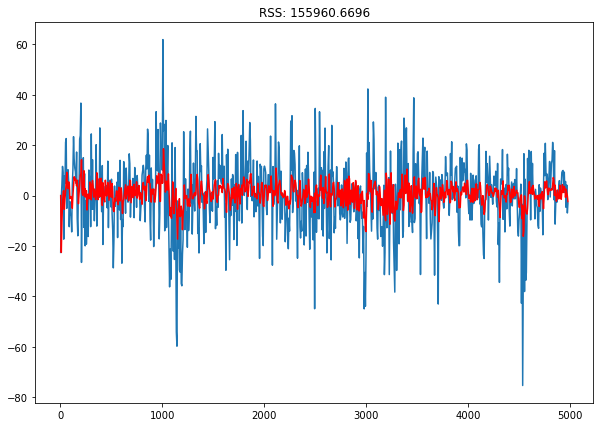

<Figure size 432x288 with 0 Axes>

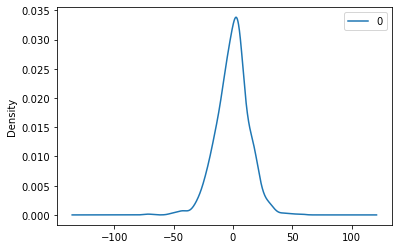

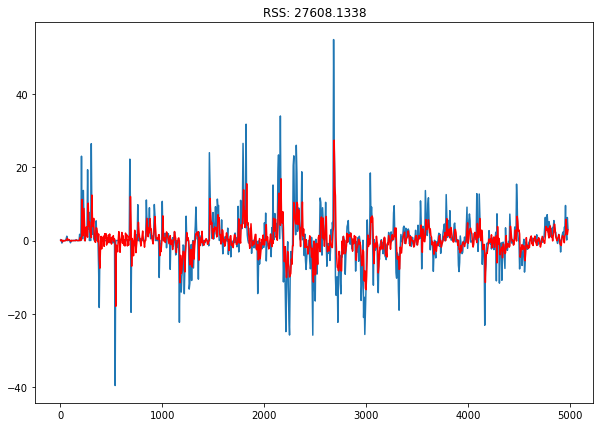

<Figure size 432x288 with 0 Axes>

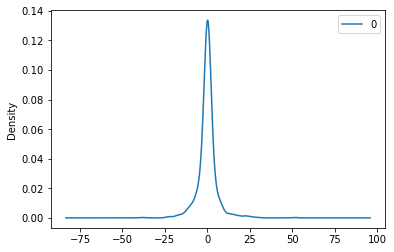

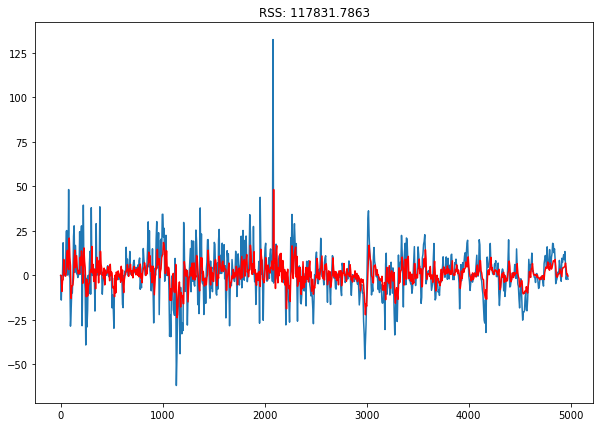

<Figure size 432x288 with 0 Axes>

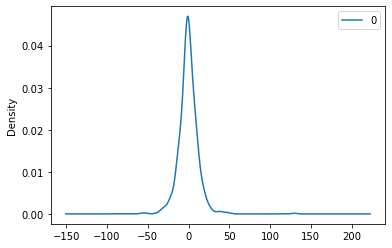

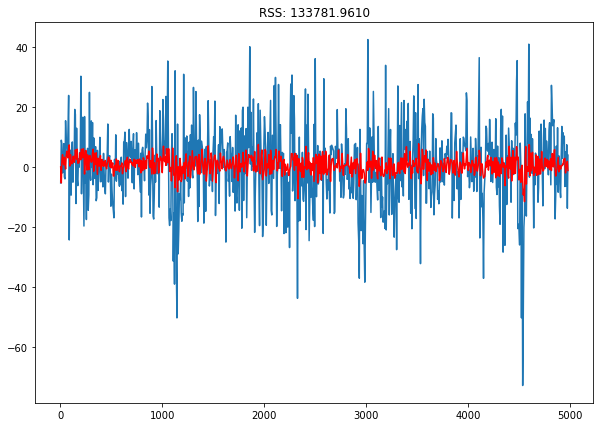

<Figure size 432x288 with 0 Axes>

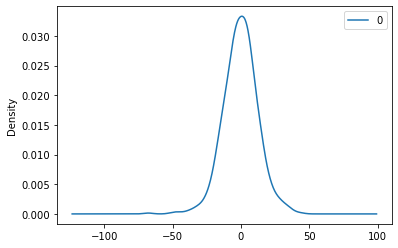

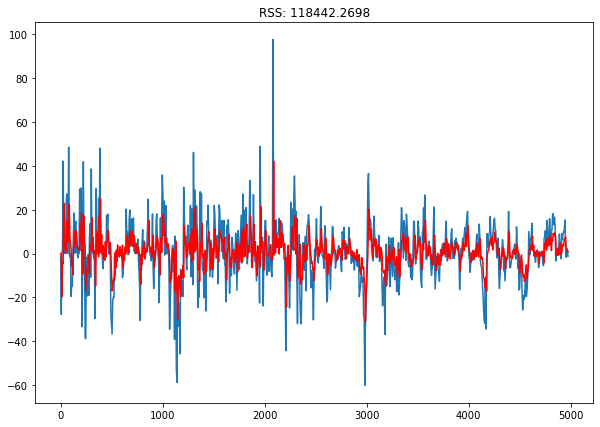

<Figure size 432x288 with 0 Axes>

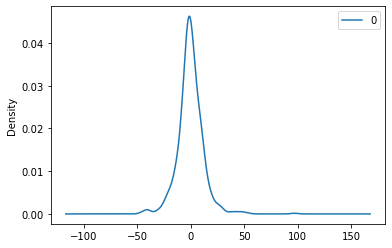

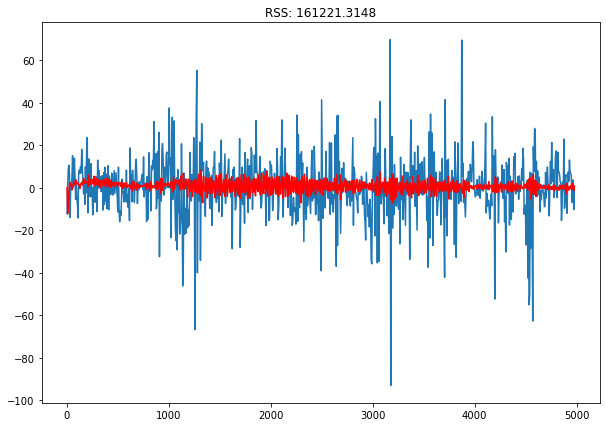

<Figure size 432x288 with 0 Axes>

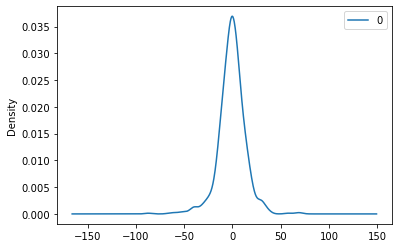

In [62]:
i = 0
para = [(5,5),(7,8),(8,9),(6,6),(6,8),(5,6)] # the set of p,q found in the graphs
for dataFrame in dataFrameS:
    p,q = para[i]
    model = ARIMA(dataFrame["CHANGE"], order=(p, 1, q))  
    results_ARIMA = model.fit()
    plt.figure(figsize=(10,7))
    plt.plot(dataFrame["CHANGE"])
    plt.plot(results_ARIMA.fittedvalues, color='red')
    plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-dataFrame["CHANGE"])**2))
    print(results_ARIMA.summary())
# plot residual errors
    plt.figure()
    residuals = pd.DataFrame(results_ARIMA.resid)
    residuals.plot(kind='kde')
    print(residuals.describe())
    i += 1

#### Moving average model 

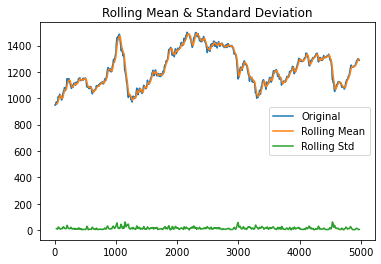

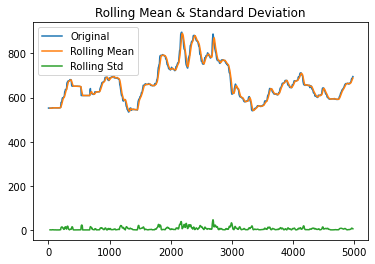

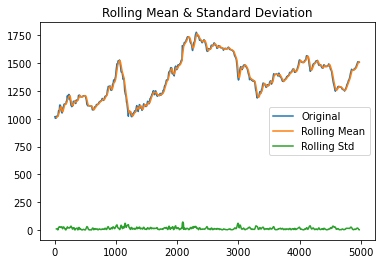

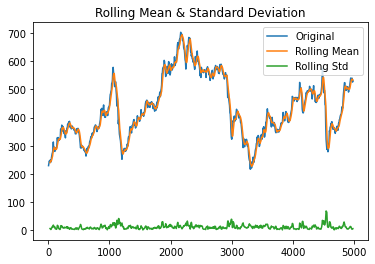

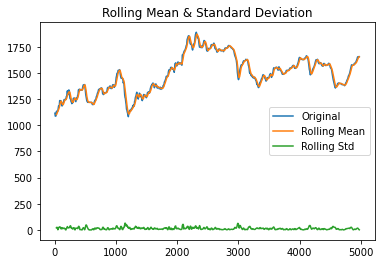

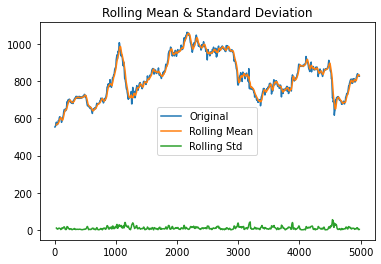

In [63]:
i = 0
for dataFrame in dataFrameS:
    rolmean = dataFrame["PRICE"].rolling(window = 5).mean()
    rolstd = dataFrame["PRICE"].rolling(window = 5).std()
    plt.figure()
    orig = plt.plot(dataFrame["PRICE"], label='Original')
    mean = plt.plot(rolmean, label='Rolling Mean')
    std = plt.plot(rolstd, label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    i += 1